## **Instação de bibliotecas**

Bibliotecas necessárias:


* Numpy
* Pandas
* Seaborn
* Matplotlib
* Scikit-Learn

Comando:

`!pip install numpy pandas scikit-learn matplotlib seaborn`


## Importa dependências

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

## Criação de dataset
Criação de conjunto de dados (aleatórios) + calculo de encargos com base nos dados inseridos previamente. (É possivel tambem subir seu proprio arquivo, desde que este respeite a configuração dos dados de entrada explicitos no código. A inclusão do path do arquivo pessoal diretamente no código pode ser necessária)

In [4]:
df = pd.DataFrame()
df_size = 10000

df["idade"] = np.random.randint(18, 90, size=df_size) # Idade entre 18 e 90 anos
df["genero"] = np.random.choice(["masculino", "feminino"], size=df_size) # Gênero masculino ou feminino
df["imc"] = np.random.randint(120, 500, size=df_size) / 10 # Indice de massa corpórea da pessoa
df["filhos"] = np.random.randint(0, 5, size=df_size) # Quantidade de filhos que a pessoa possui
df["fumante"] = np.random.choice(["sim", "não"], size=df_size) # Fumante ou não fumante
df["regiao"] = np.random.choice(["norte", "nordeste", "centro-oeste", "sul", "sudeste"], size=df_size) # Gênero masculino ou feminino

# Calcula os encargos de cada pessoa com base nos dados informados anteriormente

# Calculo base
df["encargos"] = (

        # IDADE
        df["idade"] * 80.33

        # IMC
        + df["imc"] * 255.52
)

# Multiplicadores
df["encargos"] = df["encargos"] + (

      # GÊNERO
      + np.where(df["genero"] == 'masculino', df["encargos"] * 0.1, 0) # Homens possuem maior taxa de mortalidade

      # FILHOS
      + np.where((df["genero"] == 'feminino') & (df["filhos"] > 0), df["encargos"] * 0.05, 0) # Mulheres recém-gestantes/gestante possuem uma tendencia maior a necessidade de cuidados médicos

      # FUMANTE
      + np.where(df["fumante"] == 'sim', df["encargos"] * 0.4, 0) # Individuos fumantes apresentam um enorme acrescimo na taxa de aparição de sintomas de saúde

      # REGIÃO
      + np.where(df["regiao"].isin(["sul", "sudeste"]), df["encargos"] * 0.2, 0) # Regiões sul e sudeste possuem hospitais mais caros
)

print(df)

# Exporta arquivo com dados amostrais, caso desejado
# df.to_csv(r'custos_medicos_individuais.csv', index = False)

      idade     genero   imc  filhos fumante        regiao    encargos
0        89  masculino  29.7       4     sim       sudeste  25055.1338
1        86  masculino  48.4       4     sim       sudeste  32768.4316
2        73  masculino  21.6       3     sim  centro-oeste  17074.9830
3        42  masculino  38.3       4     sim           sul  22372.4692
4        37  masculino  26.6       0     não       sudeste  12699.7546
...     ...        ...   ...     ...     ...           ...         ...
9995     67   feminino  21.1       0     não      nordeste  10773.5820
9996     19   feminino  18.5       1     sim           sul  10318.0935
9997     56  masculino  16.5       2     não         norte   9586.0160
9998     35  masculino  18.4       3     não         norte   8264.4298
9999     39   feminino  31.0       0     sim       sudeste  17686.3840

[10000 rows x 7 columns]


## 1. Exploração de dados

*   Carregamento da base de dados e exploração suas características.           
*   Analise estatística descritiva e visualização de distribuições relevantes.



Dados importados:

      idade     genero   imc  filhos fumante        regiao    encargos
0        89  masculino  29.7       4     sim       sudeste  25055.1338
1        86  masculino  48.4       4     sim       sudeste  32768.4316
2        73  masculino  21.6       3     sim  centro-oeste  17074.9830
3        42  masculino  38.3       4     sim           sul  22372.4692
4        37  masculino  26.6       0     não       sudeste  12699.7546
...     ...        ...   ...     ...     ...           ...         ...
9995     67   feminino  21.1       0     não      nordeste  10773.5820
9996     19   feminino  18.5       1     sim           sul  10318.0935
9997     56  masculino  16.5       2     não         norte   9586.0160
9998     35  masculino  18.4       3     não         norte   8264.4298
9999     39   feminino  31.0       0     sim       sudeste  17686.3840

[10000 rows x 7 columns]

Caracteristicas dos dados:
              idade           imc        filhos      encargos
count  10000

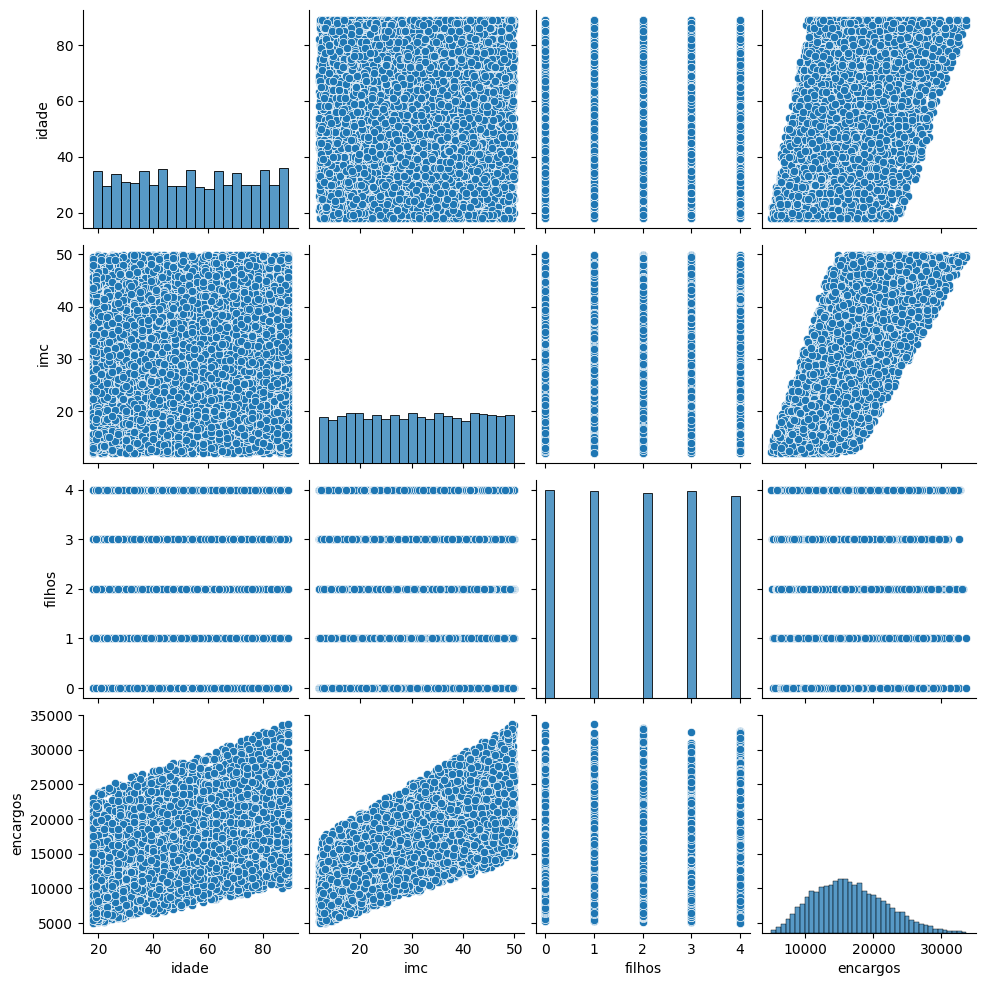

In [5]:
# Importa arquivo com os dados amostrais, caso desejado
# df = pd.read_csv(r'custos_medicos_individuais.csv')

print("\nDados importados:\n")
print(df)

print("\nCaracteristicas dos dados:")
print(df.describe())

print("\nCorrelação dos dados:\n")

sns.pairplot(df)
plt.show()


## 2. Pré-processamento dos dados

* Limpeza dos dados.
* Normalização de variáveis categóricas, utilizando One Hot Encoder.

In [6]:
print("Pré-processando dados...")
df.dropna(inplace=True) # Remove registros com valores nulos

colunas_categoricas = ["genero", "fumante", "regiao"]
colunas_numericas = [coluna for coluna in df.columns if coluna not in colunas_categoricas]

print(f"Variáveis categórias: {colunas_categoricas}")
print(f"Variáveis numéricas: {colunas_numericas}")

encoder = OneHotEncoder(sparse_output=False)
encoded_df = pd.DataFrame(
      encoder.fit_transform(df[colunas_categoricas]),
      columns=encoder.get_feature_names_out(colunas_categoricas)
)

df = pd.concat([df[colunas_numericas], encoded_df], axis=1)

Pré-processando dados...
Variáveis categórias: ['genero', 'fumante', 'regiao']
Variáveis numéricas: ['idade', 'imc', 'filhos', 'encargos']


## 3. Modelagem

* Criação de modelos preditivos de Regressão Linear, Árvore de Decisão e Gradient Boosting Machine (Regressão)
* Divisão dos dados em conjuntos de treinamento e teste

In [7]:
# Modelo de Regressão Linear
modelo_lr = LinearRegression()

# Modelo de regressão Árvore de Decisão
modelo_dtr = DecisionTreeRegressor()

# Modelo de Gradient Boosting (Regressão)
modelo_gbr = GradientBoostingRegressor()

# Normalização dos dados
x = df.drop('encargos', axis=1)
y = df['encargos']

x_scaled = StandardScaler().fit_transform(x)
y_scaled = StandardScaler().fit_transform(y.values.reshape(-1, 1))

# Separação dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

## 4. Treinamento e avaliação do modelo

In [8]:
# Treinamento e predição de modelo de Regressão linear
modelo_lr.fit(x_train, y_train)
y_pred_lr = modelo_lr.predict(x_test)

# Treinamento e predição de modelo de Árvore de decisão
modelo_dtr.fit(x_train, y_train)
y_pred_dtr = modelo_dtr.predict(x_test)

# Treinamento e predição de modelo de Árvore de decisão
modelo_gbr.fit(x_train, y_train)
y_pred_gbr = modelo_gbr.predict(x_test)

/home/bring/miniconda3/envs/wsl2_machine_learning_test_env/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


## 5. Validação estatistica (Resultados)
Métricas estatísticas para validação à eficácia dos modelo:
* Erro Quadrático Médio (MSE)
* Coeficiente de Determinação (R²)
* Erro Absoluto Médio (MAE)
* Grafico de comparação de eficiência dos três modelos



Regressão Linear:
Erro Quadrático Médio (MSE): 0.020951799553286497
Erro Absoluto Médio (MAE): 0.10843507107484658
Coeficiente de Determinação (R^2): 0.9784795371349582

Árvore de Decisão:
Erro Quadrático Médio (MSE): 0.008418102812147239
Erro Absoluto Médio (MAE): 0.0687231818519701
Coeficiente de Determinação (R^2): 0.9913534172326262

Gradient Boosting (Regressão):
Erro Quadrático Médio (MSE): 0.002590676935403395
Erro Absoluto Médio (MAE): 0.03930196318397057
Coeficiente de Determinação (R^2): 0.9973390082010916

Correlação Visual:


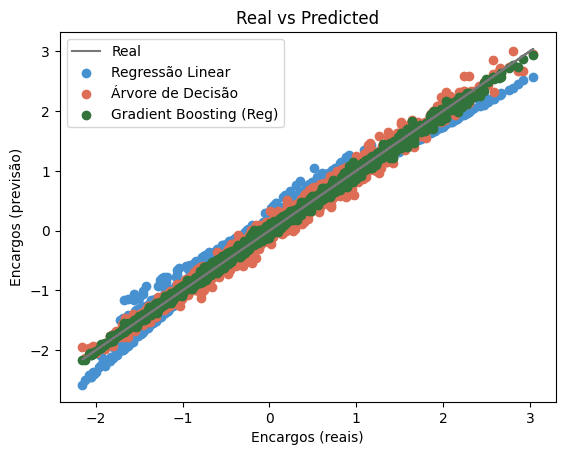

In [9]:
print("Regressão Linear:")
print('Erro Quadrático Médio (MSE):', mean_squared_error(y_test, y_pred_lr))
print('Erro Absoluto Médio (MAE):', mean_absolute_error(y_test, y_pred_lr))
print('Coeficiente de Determinação (R^2):', r2_score(y_test, y_pred_lr))

print("\nÁrvore de Decisão:")
print('Erro Quadrático Médio (MSE):', mean_squared_error(y_test, y_pred_dtr))
print('Erro Absoluto Médio (MAE):', mean_absolute_error(y_test, y_pred_dtr))
print('Coeficiente de Determinação (R^2):', r2_score(y_test, y_pred_dtr))

print("\nGradient Boosting (Regressão):")
print('Erro Quadrático Médio (MSE):', mean_squared_error(y_test, y_pred_gbr))
print('Erro Absoluto Médio (MAE):', mean_absolute_error(y_test, y_pred_gbr))
print('Coeficiente de Determinação (R^2):', r2_score(y_test, y_pred_gbr))


print("\nCorrelação Visual:")

plt.plot(y_test, y_test, color="#777", label="Real")
plt.scatter(y_test, y_pred_lr, color="#4791D1", label="Regressão Linear")
plt.scatter(y_test, y_pred_dtr, color="#DD6E55", label="Árvore de Decisão")
plt.scatter(y_test, y_pred_gbr, color="#31733a", label="Gradient Boosting (Reg)")
plt.xlabel('Encargos (reais)')
plt.ylabel('Encargos (previsão)')
plt.legend()
plt.title("Real vs Predicted")
plt.show()